In [1]:
import numpy as np
import matplotlib.pyplot as plt

project = 'newfault'
traindate = '2024-10-01'
testdate = '2024-10-02'
traindate_path = '/home/sdybing/gnss-picker/cnn_models_outputs/' + project + '_fq_train/models/traindate_' + traindate + '/'
test_outputs_path = traindate_path + 'data/'
figure_save_dir = traindate_path + 'figures/'
best_thresh = 0.135 # From code 2

results = np.load(test_outputs_path + 'fakequakes_testing/fqtest_metadata_with_results_pgd_snr_locs_hypdists.npy')
# Columns:

# 0: FQ rupture name
# 1: station name
# 2: magnitude
# 3: result (true pos, etc.)
# 4: PGD
# 5: SNR_N
# 6: SNR_E
# 7: SNR_Z
# 8: FQ rupture hypocenter lat
# 9: FQ rupture hypocenter lon
# 10: FQ rupture hypocenter depth
# 11: station lat
# 12: station lon
# 13: hypocentral distance (m)

waveforms = np.load(test_outputs_path + testdate + '_fqtest_orig_data.npy')
predictions = np.load(test_outputs_path + testdate + '_fqtest_predictions.npy')
targets = np.load(test_outputs_path + testdate + '_fqtest_target.npy')

In [2]:
truepos_idxs = np.where(results[:,3] == 'true pos')[0]
falsepos_idxs = np.where(results[:,3] == 'false pos')[0]
trueneg_idxs = np.where(results[:,3] == 'true neg')[0]
falseneg_idxs = np.where(results[:,3] == 'false neg')[0]

In [3]:
results.shape

(91740, 14)

In [4]:
print('Percent true positive: ' + str(np.round(100*len(truepos_idxs)/len(results),1)) + '%')
print('Percent true negative: ' + str(np.round(100*len(trueneg_idxs)/len(results),1)) + '%')
print('Percent false positive: ' + str(np.round(100*len(falsepos_idxs)/len(results),1)) + '%')
print('Percent false negative: ' + str(np.round(100*len(falseneg_idxs)/len(results),1)) + '%')

Percent true positive: 11.4%
Percent true negative: 48.2%
Percent false positive: 1.8%
Percent false negative: 38.6%


In [5]:
waveforms[falsepos_idxs].shape

(1613, 128, 3)

1


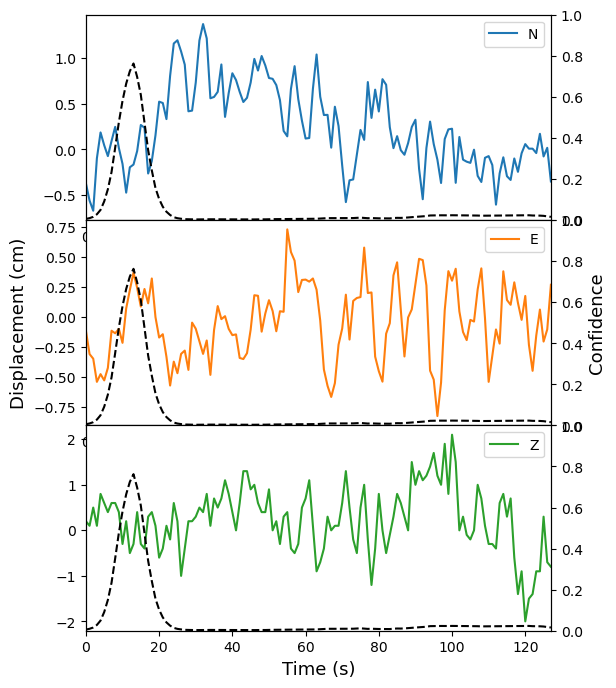

2


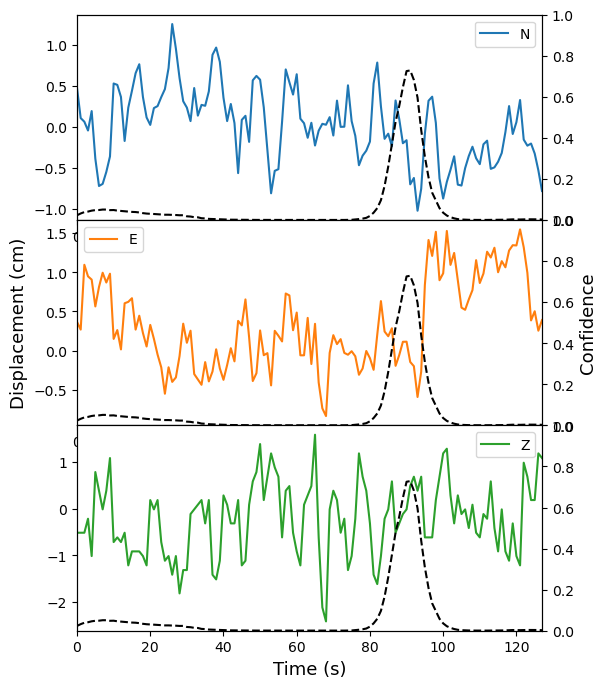

3


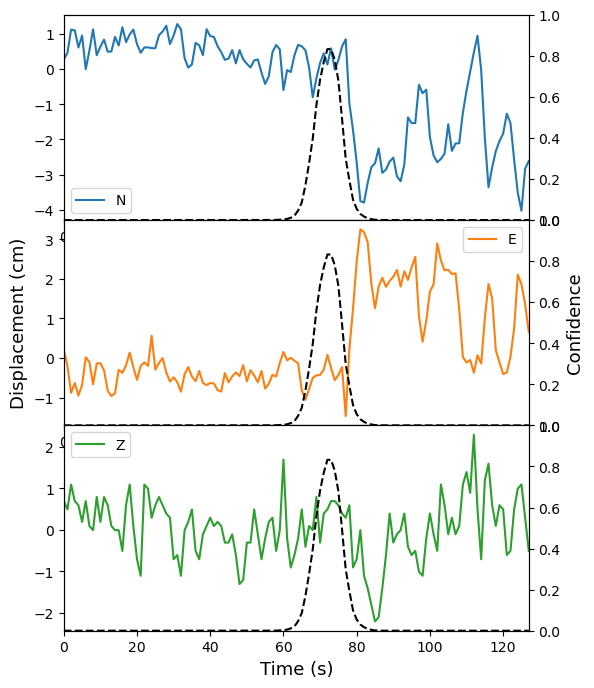

4


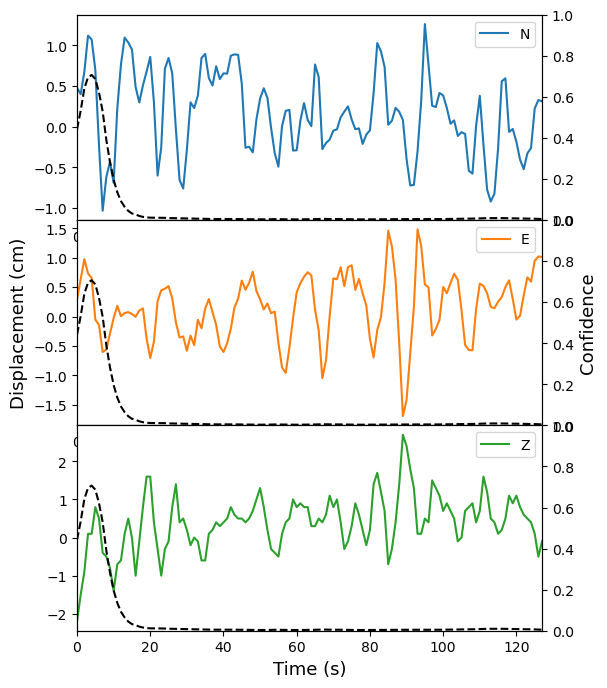

5


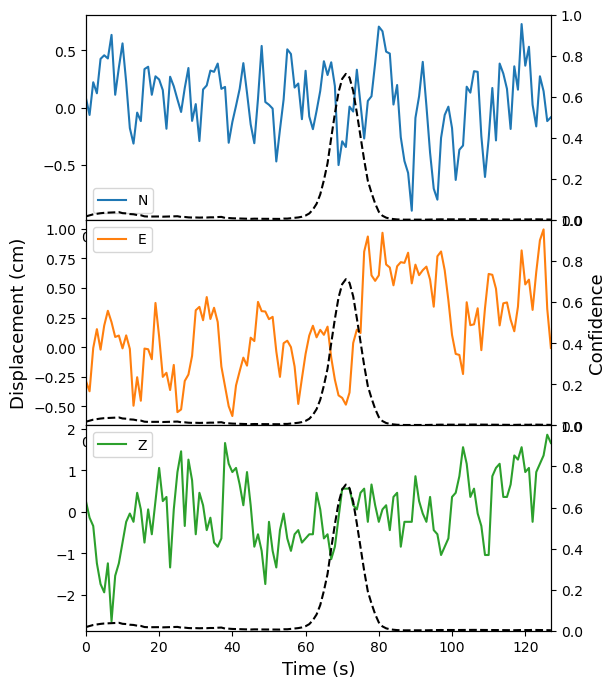

6


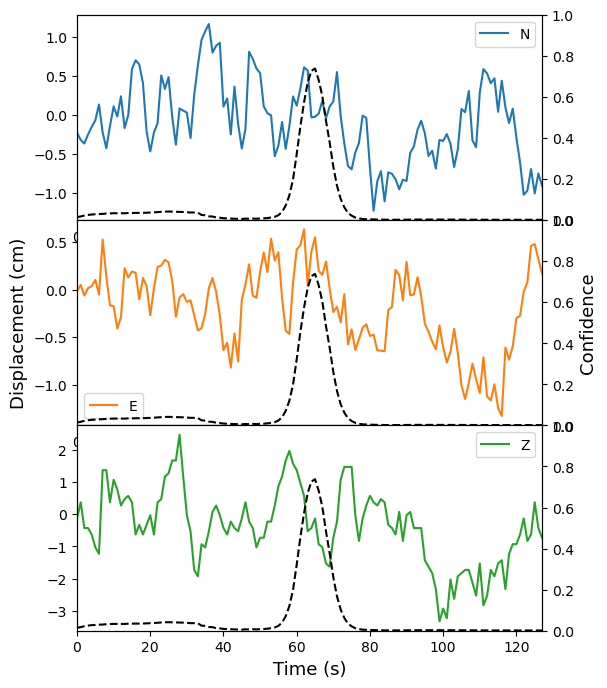

7


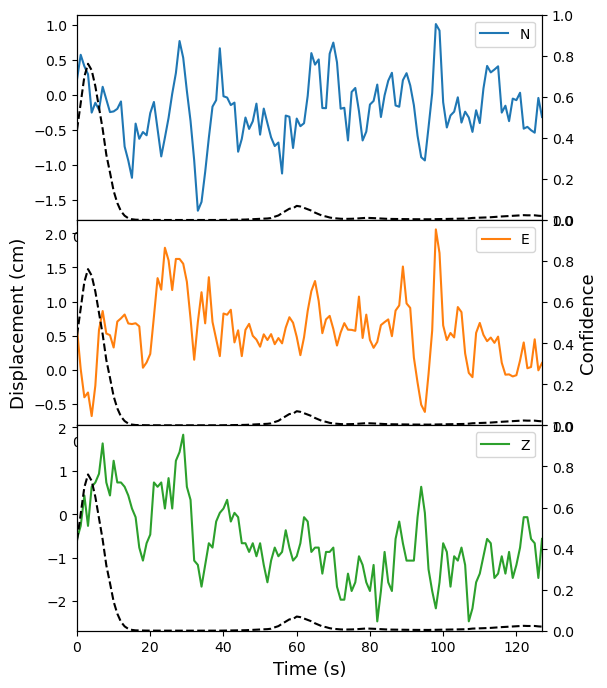

8


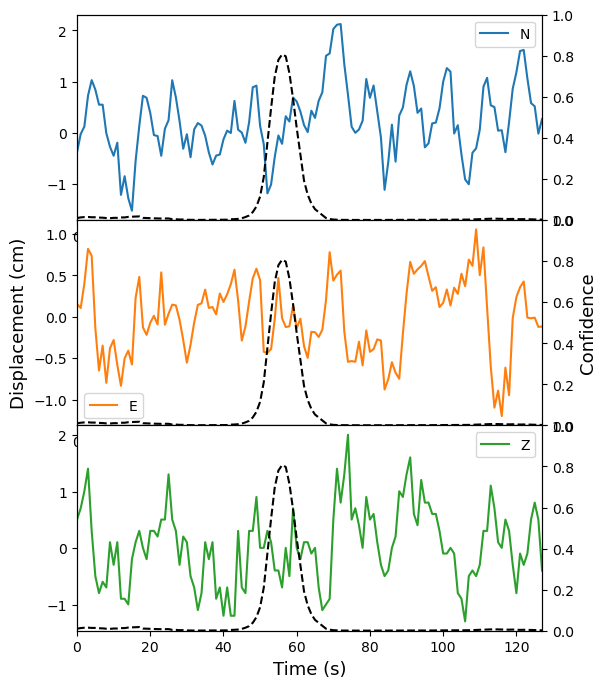

9


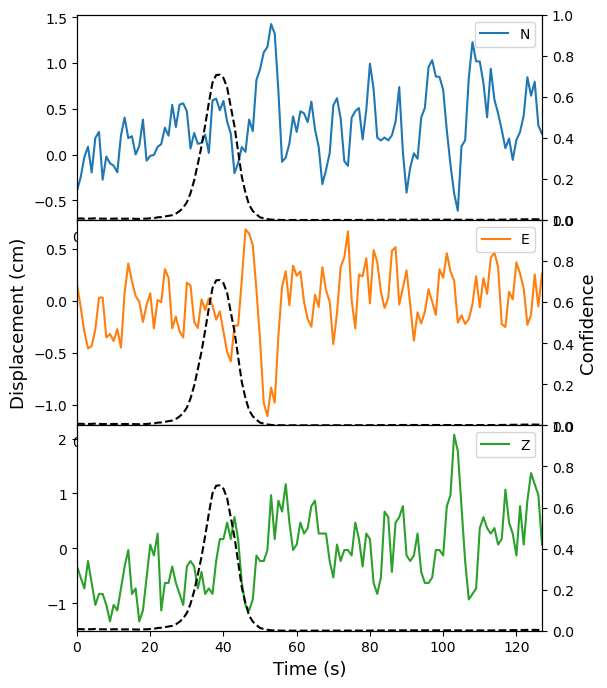

In [6]:
count = 0

for idx in falsepos_idxs:
    
    waveform = waveforms[idx]
    pred = predictions[idx]
    
    if max(pred) >= 0.7:
        
    #         print(idx)
        count += 1
        print(count)

        fig = plt.subplots(nrows = 3, ncols = 1, figsize = (6,8), dpi = 100, facecolor = 'white')

        ax = plt.subplot(311)
        ax.plot(waveform[:,0]*100, color = 'C0', label = 'N')
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.set_ylim(0,1)

        ax = plt.subplot(312)
        ax.plot(waveform[:,1]*100, color = 'C1', label = 'E')
        ax.set_ylabel('Displacement (cm)', fontsize = 13)
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.set_ylabel('Confidence', fontsize = 13)
        ax2.set_ylim(0,1)

        ax = plt.subplot(313)
        ax.plot(waveform[:,2]*100, color = 'C2', label = 'Z')
        ax.set_xlabel('Time (s)', fontsize = 13)
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.set_ylim(0,1)

        plt.subplots_adjust(hspace = 0)

        plt.show();
#         plt.savefig(figure_save_dir + '/conf_over_70/fqtest_falseposcheck_' + str(count) + '.png', format = 'PNG')
#         plt.close();